In [1]:
using OrdinaryDiffEq
using Plots

In [21]:
L=1.
M=400 # number of space-points in the discretization
t=1. # final time
dx = L/M
dt = 0.1 * dx
U=5 # number of fields
flu_i=zeros(M*U) # flux variables for the initial data (these are used for the flux function)
con_i=zeros(M*U) # conservative initial data (these are the ones which are evolved)
du=zeros(M*U) # for the rhs
x = zeros(M) # the coordinates
χ = [- 1.; - 2.; - 10.]
ξ = (49.735919716217296, 16.578639905405765)
par_eq = (χ, ξ) #Bx, s, a some parameters to use on the equations

([-1.0, -2.0, -10.0], (49.735919716217296, 16.578639905405765))

In [5]:
include("choques_utils.jl") # all functions needed for evolution
include("Flux_function.jl")
include("inversion.jl")

 Activating environment at `~/Julia/Fluidos_Conformes/Conf_Fluids/Project.toml`
   Updating registry at `~/.julia/registries/General`
  Resolving package versions...
No Changes to `~/Julia/Fluidos_Conformes/Conf_Fluids/Project.toml`
No Changes to `~/Julia/Fluidos_Conformes/Conf_Fluids/Manifest.toml`
┌ Info: Precompiling Symbolics [0c5d862f-8b57-4792-8d23-62f2024744c7]
└ @ Base loading.jl:1278


f_to_c!

In [8]:
par = (par_eq, 1. /dx, U, N, Flux, Speed_max)

((1, 0.0, 1.0), 400.0, 5, 5, Flux, Speed_max)

In [10]:
function evolution(du,u,par,t)
    # this is the function that is taken by the time-integrator
    par_eq, h1, U, M, Flux, Speed_max = par

    for j ∈ 1:M
        mp5(du,u,par,j)
    end
    return du[:]
end

evolution (generic function with 1 method)

In [24]:
# the initial data
#u0=zeros(M*U) # for the initial data U0=(Sx,Sy,By)
x0 = 0.4; x1 = 0.6

flu_0 = reshape(flu_i,(M,U))
con_0 = reshape(con_i,(M,U))

for i in 1:M
    x[i] = dx*(i-1)
    if x[i] > x0 && x[i] < x1
        flu_0[i,2] = 0.1 * (x[i] - x0)^4 * (x[i] - x1)^4 / (x1-x0)^8 * 250                    #Sz
        flu_0[i,4] = -0.0 # * sin(pi*(x[i] - x0)/(x1-x0))^4 * sin(2*pi*(x[i] - x0)/(x1-x0))     #By
        
    end
    flu_0[i,5] = 0. #Bz
    flu_0[i,1] = -1.  
end

f_to_c!(flu_0',con_0', (χ, U, M))
#f(du,u0,par,t);

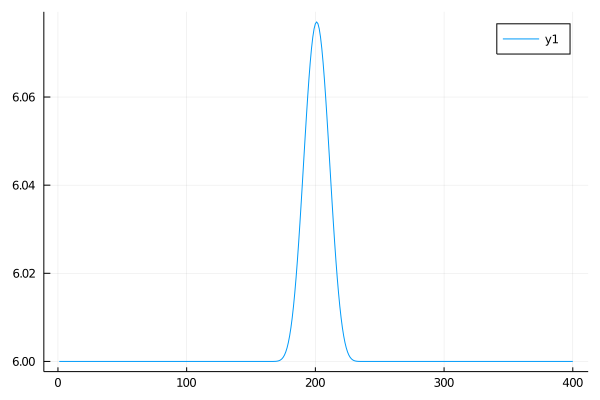

In [26]:
plot(con_0[:,1])

In [19]:
prob = ODEProblem(evolution,u0,(0.0,t),par);

In [20]:
sol = solve(prob,SSPRK33(),dt=dt,saveat=0.01*t); # This, I think, is a TVD method
#sol = solve(prob,SSPRK33(),dt=dt,save_everystep=false) # to get just the end values
#sol = solve(prob,RK4(),dt=dt);

LoadError: [91mDimensionMismatch("new dimensions (5, 5) must be consistent with array size 2000")[39m